## Exploratory Analysis of Deep Blue's Xtract Crawl

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load crawl CSV
deep_blue_crawl_df = pd.read_csv("data/deep_blue_xtract_crawl.csv")

In [4]:
# Get compressed extensions
compressed_extensions = set(deep_blue_crawl_df[deep_blue_crawl_df.label == "compressed"].extension)

In [5]:
# Get data on file size of each extension
for extension in compressed_extensions:
    print(f"{extension}: ")
    print(deep_blue_crawl_df[deep_blue_crawl_df.extension == extension].describe())

tar: 
         size_bytes
count  1.600000e+01
mean   4.482301e+09
std    8.152891e+09
min    2.910800e+04
25%    4.274491e+08
50%    1.001690e+09
75%    1.453554e+09
max    2.102018e+10
gz: 
         size_bytes
count  3.300000e+01
mean   2.128045e+10
std    3.965044e+10
min    1.806800e+04
25%    3.972696e+07
50%    9.708754e+08
75%    1.050042e+10
max    1.167499e+11
zip: 
         size_bytes
count  8.240000e+02
mean   3.516081e+09
std    2.539581e+10
min    4.451000e+03
25%    5.159525e+06
50%    2.541659e+07
75%    1.542360e+08
max    4.280410e+11


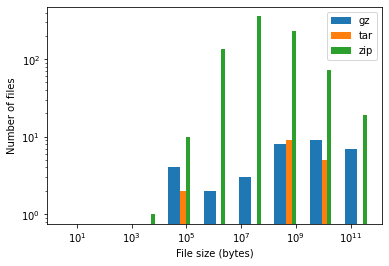

In [6]:
# Split the file size data by extension
gz_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "gz"].size_bytes.values
tar_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "tar"].size_bytes.values
zip_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "zip"].size_bytes.values

# Create bins in logspace
bins = np.logspace(0,np.log10(max(deep_blue_crawl_df[deep_blue_crawl_df.label == "compressed"].size_bytes.values)), 10)

# Plot the data
plt.hist([gz_data, tar_data, zip_data], label=["gz", "tar", "zip"], bins=bins)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("File size (bytes)")
plt.ylabel("Number of files")
plt.legend(loc="upper right")